Here is my homework from a Quanitative Finance course. All functions are mine, my comments are in *italic*.

# Short Tutorial

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Mikhail Baranov"

README

* You should delete "raise NotImplementedError()" from template functions to make final workable functions.
* You can not delete some cells from this notebook. It is ok! Do not worry about that. It's made for more convenient pipeline of checking your solutions. If you can not delete some copied and pasted base template cells you can go to the step back just via `Ctrl + Z` (or may be `Cmd + Z` for Mac OS)
* Please be free creating your cells above and bottom the default ones to organize your solution in the way you want (creating additional functions, classes, variables, comments etc). 

---

# Applied Quantitative Finance
## Spring 2022
### Home Assignment 2

# Problem 1


## Part 1.1 (2 points)
Choose and implement another pseudo-random number generator to sample from the uniform distribution over $[0,\,1]$. The points do not depend on the type of generator. Choose it to adjust the difficulty:
1. Another LCG  -- easy
2. Another type of generator -- medium

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
def _update(k, m, d):
    """
    Help function that makes a step with a simple LCG algorithm.
    k is random seed here.
    """
    return (m * k) % d

In [4]:
def pseudo_random_number_generator():
    '''This function must generate pseudo random number according to the approach you've chosen.
    
    Note: you must think how to encapsulate (hide) the seed in your code. Please use `set_seed` function for that. 
        The generator must works in the following way 
            >>> set_seed(42)
            >>> pseudo_random_number_generator()

    :return: random value (one number)
    '''

    # get seeds
    seed1 = getattr(pseudo_random_number_generator, "seed1")
    seed2 = getattr(pseudo_random_number_generator, "seed2")
    seed3 = getattr(pseudo_random_number_generator, "seed3")

    # generate pseudorandom number
    seed1 = _update(seed1, 171, 30269)
    seed2 = _update(seed2, 172, 30307)
    seed3 = _update(seed3, 170, 30323)

    tmp = seed1 / 30269 + seed2 / 30307 + seed3 / 30323
    y = tmp - int(tmp)

    # update seeds
    setattr(pseudo_random_number_generator, "seed1", seed1)
    setattr(pseudo_random_number_generator, "seed2", seed2)
    setattr(pseudo_random_number_generator, "seed3", seed3)

    return y

In [5]:
def set_seed(seed):
    '''This function sets the seed for pseudo random number generator. 
    
    :param seed: the number (int) 
    :return: value
    '''
    
    setattr(pseudo_random_number_generator, "seed1", seed)
    setattr(pseudo_random_number_generator, "seed2", seed)
    setattr(pseudo_random_number_generator, "seed3", seed)

**You should below describe the algorithm of the pseudo random number generator you use**

*This algorithm is based on three simple LCGs. Each one generates a number, and the final pseudorandom number is the fractional part of the sum of the three numbers. This algorith has a period of about $3 \cdot 10^{13}$ iterations. See Lagutin (Наглядная математическая статистика) Ch.2 §3.*

In [6]:
set_seed(1234)
print(pseudo_random_number_generator())
print([pseudo_random_number_generator() for _ in range(7)])

0.8927382503765295
[0.7433264676910738, 0.5799201811018624, 0.3760667714125807, 0.23564119422737817, 0.6569273412336978, 0.9866197982585865, 0.552513463266112]


In [7]:
# Check that seed works

set_seed(1234)
VALUE_1 = pseudo_random_number_generator()
set_seed(4321)
VALUE_2 = pseudo_random_number_generator()
set_seed(1234)
VALUE_1_NEW = pseudo_random_number_generator()

assert np.abs(VALUE_1 - VALUE_1_NEW) < 1e-08
assert np.abs(VALUE_2 - VALUE_1) > 1e-08

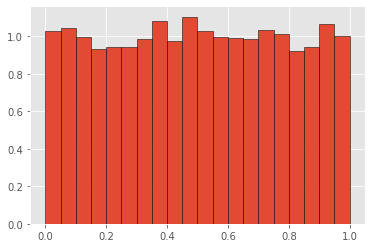

In [8]:
x = [pseudo_random_number_generator() for _ in range(10000)]
plt.hist(x, bins=20, density=True, ec='k');

## Part 1.2 (2 points)
Show that your generator works -- perform at least 2 statistical tests. Choose the tests to adjust the difficulty:
1. $\chi^2$ test for the distribution and the standard test for autocorrelation -- easy (we did those)
2. Test the distribution and autocorrelation via other statistical tests -- medium
3. Choose other tests and implement them -- advanced

Don't forget to document what you're doing

**Remember that you can add your cells in order to make functions below more clear. Please describe the tests you use 
in the form below**

*The first one is the Kolmogorov-Smirnov test for uniform distribution.*

*The second test is based on the number of inversions in an array. An inversion in a sequence $x$ means that $\;i > j\;$ but $\;x_i < x_j$. In a random sequence the number of inversions is asymptotically normal with $\mu = \frac{n(n-1)}{4}$ and $\sigma^2 = \frac{n(n-1)(2n+5)}{72}$. This can be used to test a sequence for randomness. See Lagutin Ch.7 §2 for more detail.*

In [9]:
from scipy.stats import kstest, norm

In [10]:
set_seed(42)
SEQUENCE_TEST = [pseudo_random_number_generator() for _ in range(1000)]

In [11]:
def pseudo_random_number_generator_test1(sequence):
    '''This function must check that generated sequence is random. 
    
    :param sequence: the sequence (Iterable object: list, tuple etc) of your pseudo random numbers
    :return: True (or False)
    '''
    
    _, pvalue = kstest(
        sequence,
        cdf="uniform",            # distribution from scipy.stats
        alternative="two-sided"   # The null hypothesis is that the two distributions are identical.
                                  # The alternative is that they are not identical.
        )
    return pvalue >= 0.01

In [12]:
print(pseudo_random_number_generator_test1(SEQUENCE_TEST))

True


In [13]:
# https://stackoverflow.com/questions/337664/counting-inversions-in-an-array
def count_inversion(lst):
    return merge_count_inversion(lst)[1]

def merge_count_inversion(lst):
    if len(lst) <= 1:
        return lst, 0
    middle = int( len(lst) / 2 )
    left, a = merge_count_inversion(lst[:middle])
    right, b = merge_count_inversion(lst[middle:])
    result, c = merge_count_split_inversion(left, right)
    return result, (a + b + c)

def merge_count_split_inversion(left, right):
    result = []
    count = 0
    i, j = 0, 0
    left_len = len(left)
    while i < left_len and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            count += left_len - i
            j += 1
    result += left[i:]
    result += right[j:]
    return result, count 

In [14]:
def pseudo_random_number_generator_test2(sequence):
    '''This function must check that generated sequence is random. 
    
    :param sequence: the sequence (Iterable object: list, tuple etc) of your pseudo random numbers
    :return: True (or False)
    '''
    
    n_inv = count_inversion(sequence)
    n = len(sequence)
    mu = n * (n - 1) / 4
    sigma = np.sqrt(n * (n - 1) * (2 * n + 5) / 72)
    n_inv_std = (n_inv - mu) / sigma

    # probability of this number of inversions,
    # given a random sequence
    pvalue = 2 * (1 - norm.cdf(n_inv_std))
    return pvalue >= 0.01
    

In [15]:
print(pseudo_random_number_generator_test2(SEQUENCE_TEST))

True


# Problem 2


## Part 2.1 (2 points)
Implement any method for generating the standard normal distribution. Use your generator from Problem 1 as the source of randomness. Choose the method to adjust the difficulty:
1. Box-Muller and CLT-based approximation -- easy
2. CDF inversion -- medium; you have to explain the approximation you used. Hint: you can easily find many approximations online. Just don't forget to include the reference to the source.
3. Rejection sampling -- medium. Hint: use the Cauchy distribution as proposal. A Cauchy random variable can be easily generated via CDF inversion. You'll have to find $k$ using pen and paper. Hint 2: you can find an exact value of $k$, but a reasonable upper bound will do. Either way, you have to provide a justification for the choice of $k$.

**Descibe the method you implement in the form below**

*I am going to implement rejection samping. It is easy to show that $-\tan(\pi U + \frac{\pi}{2})\sim \text{Cauchy}$ if $U$ is uniformly distributed.*

*Let $f(x)$ be the pdf of the normal distribution and $g(x)$ be the pdf of the cauchy distribution. Plotting $f(x)$ and $kg(x)$ for different $k$, one can see that for optimal $k$ there exists $x_0: kg(x_0) = f(x_0)$ and $kg'(x_0) = f'(x_0)$. The solution is $x_0 = \pm 1$ and $k = \sqrt{\frac{2\pi}{e}}$.*

In [16]:
from scipy.stats import cauchy

In [17]:
k = np.sqrt(2 * np.pi / np.exp(1))

def generate_normal_random_number():
    '''This function must use pseudo_random_number_generator() function in order 
    to obtain normally distributed values
    
    :return: normal random value (one number)
    '''
    while True:    
        u1, u2 = [pseudo_random_number_generator() for _ in range(2)]
        proposal = - np.tan(np.pi * (2 * u1 + 1) / 2)
        acceptance_prob = norm.pdf(proposal) / (k * cauchy.pdf(proposal))
        if u2 < acceptance_prob:
            break

    return proposal

In [18]:
set_seed(1234)
print(generate_normal_random_number())
print([generate_normal_random_number() for _ in range(7)])

-0.2564890881481288
[1.094548201065257, 1.8092071098710412, -0.48639598356451497, 0.35419743968957734, -0.33678567904866397, -0.7606351682538526, 1.045062688676755]


In [19]:
x = np.array([generate_normal_random_number() for _ in range(int(1e5))])

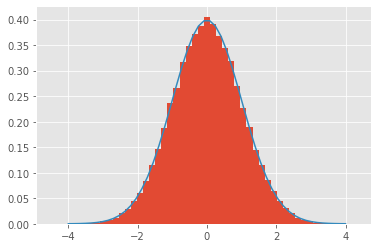

In [20]:
t = np.linspace(-4, 4, num=50)
plt.hist(x, density=True, bins=50)
plt.plot(t, norm.pdf(t));

## Part 2.2 (2 points)
Show that your generator works -- perform a statistical test to show that the distribution is indeed normal.

**Descibe the test you choose in the form below**

*Let us try a test described in Lagutin, Ch.12 §4. It is based on *central moments* (I am not sure whether it is a correct translation):*

$
M_k = \frac{1}{N} \sum_{i}^{n} (X_i - \overline{X})^k
$

*One can calculate skewness and kurtosis*: 

$
G_1 = \frac{M_3}{M_2^{3/2}}\qquad G_2 = \frac{M_4}{M_2^2} - 3
$

*Their unbiased estimators and asymptotic distributions are described in the book and implemented here.*

In [21]:
def normal_random_number_test(sequence):
    '''This function must check that generated sequence is normal. 
    
    :param sequence: the sequence (Iterable object: list, tuple etc) of your pseudo random numbers
    :return: True (or False)
    '''

    # skewness and kurtosis
    m = np.mean(sequence)
    M2, M3, M4 = [np.mean((sequence - m) ** k) for k in [2, 3, 4]]
    G1 = M3 / M2 ** (3 / 2)
    G2 = M4 / M2 ** 2

    # unbiased estimators
    n = len(sequence)
    G1_ = np.sqrt(n * (n - 1)) / (n - 2) * G1
    G2_ = (n - 1) / (n - 2) / (n - 3) * ((n + 1) * G2 + 6)

    # they are asymptotically normal with mu = 0
    # and sigma
    sigma1 = np.sqrt(
        6 * n * (n - 1) / (n - 2) / (n + 1) / (n + 3)
    )

    sigma2 = np.sqrt(
        24 * n * (n - 1) ** 2 / (n - 3) / (n - 2) / (n + 3) / (n + 5)
    )

    # statistical tests
    pvalue1 = 2 * (1 - norm.cdf(G1_ / sigma1))
    pvalue2 = 2 * (1 - norm.cdf(G2_ / sigma2))

    # let the two test be independent
    return (pvalue1 > np.sqrt(0.01)) or (pvalue2 > np.sqrt(0.01))

In [22]:
set_seed(42)
SEQUENCE_TEST_NORMAL = [generate_normal_random_number() for _ in range(1000)]
print(normal_random_number_test(SEQUENCE_TEST_NORMAL))

True


# Problem 3

## Part 3.1 (1 point)
Use the generator from Problem 2 to write a sampler for the 2-dimensional normal distribution:


\begin{equation}
X\sim N \left (
\begin{pmatrix}
1 \\ 2
\end{pmatrix},\,
\begin{pmatrix}
1 & 2 \\ 2 & 5
\end{pmatrix}
\right )
\end{equation}

Show that your sampler works and the distribution is indeed as required.

We were warned on the seminar that Cholesky Decomposition will not help us in case of a singular covariance matrix. Let's try another way, then😉

In [23]:
def _sample_normal_distribution(mu, sigma):
    """
    Samples fron multivariate normal distribution with expectation mu
    and covariance matrix sigma.
    
    The algorith is the following:
    1) Sample the first element of the gaussian vector using the unconditional distribution.
    2) If n > 1, compute conditional expectation and covariance matrices and start
       a recursive call for a vector with dimension (n - 1).

    The formulae for conditional expectation and covariance are from:
    https://cs.nyu.edu/~roweis/notes/gaussid.pdf
    Huge thanks to Bayesian ML course that I took in the previous semester!!!

    Parameters
    ----------
    mu : np.array with shape (n,)
       Vector of expected values
    sigma : np.array with shape (n, n)
       Covariance matrix

    Returns
    -------
    sample : list
        Random sample from normal distribution.
    """

    # sample the first elem of the vector
    mean, sd = mu[0], np.sqrt(sigma[0, 0])
    x = mean + sd * generate_normal_random_number()

    if len(mu) == 1:
        return [x]

    else:
        # compute conditional mu, sigma and make a recursive call
        A, B, C = sigma[0, 0], sigma[1:, 1:], sigma[[0], 1:]
        C_t_A_inv = C.T / A
        a, b = mu[0], mu[1:]

        conditional_mu = b + (C_t_A_inv * (x - a)).flatten()  # conditional expectation is affected by the samlple
        conditional_sigma = B - C_t_A_inv @ C                 # conditional covariance is not!
        
        return [x] + _sample_normal_distribution(conditional_mu, conditional_sigma)


In [24]:
mu2 = np.array([1, 2])
sigma2 = np.array([
    [1, 2],
    [2, 5]
])

def sample_2_dimensional_normal_distribution():
    '''This function draws required 2-dimensional normal distribution
    
    :return: coordinates of X in the form of numpy.array object
    '''
    return _sample_normal_distribution(mu2, sigma2)

In [25]:
set_seed(42)
print(sample_2_dimensional_normal_distribution())

[0.2187803981769536, -0.20867819593311288]


**Test for closeness to the true answer for covariance matrix and mean values is presented below. Remember that you have to check normality and make other appropriate tests for this problem.**

In [26]:
set_seed(1234)

ARRAY_TEST2 = np.array([sample_2_dimensional_normal_distribution() for _ in range(10000)]).transpose()
COV_TEST2 = np.cov(ARRAY_TEST2)
TEST2, MESSAGE2 = (np.all(np.isclose(COV_TEST2, np.array([[1, 2], [2, 5]]), atol=1e-01)),
                'Your sampler does not obtain X with required parameters')
assert TEST2, MESSAGE2

*First, let's make a scatterplot with the density function of the required distribution:*

In [27]:
from scipy.stats import multivariate_normal

In [28]:
n_sigma = 3
X, Y = np.meshgrid(
    np.linspace(mu2[0] - n_sigma * np.sqrt(sigma2[0, 0]), mu2[0] + n_sigma * np.sqrt(sigma2[0, 0]), num=50),                                    # mu ± n_sigma * sigma
    np.linspace(mu2[1] - n_sigma * np.sqrt(sigma2[1, 1]), mu2[1] + n_sigma * np.sqrt(sigma2[1, 1]), num=50)
)

Z = multivariate_normal.pdf(np.dstack([X, Y]), mean=mu2, cov=sigma2)

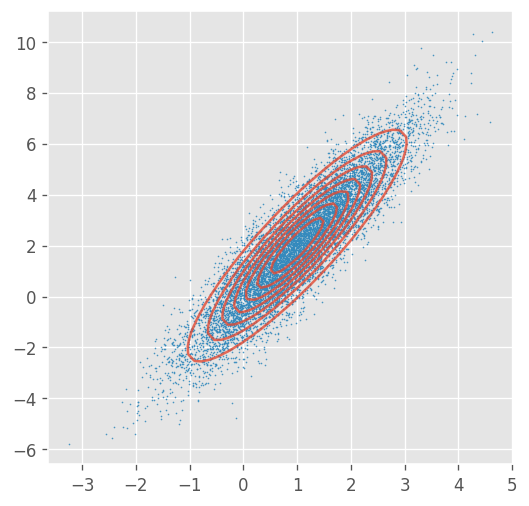

In [29]:
plt.figure(dpi=120, figsize=[5, 5])

plt.contour(X, Y, Z, colors=["C0"], levels=8, alpha=0.8)
plt.scatter(*ARRAY_TEST2, marker='.', alpha=0.8, c='C1', s=1);

*Points seem to really come from the desired distribution. Let's make a formal teus using [Pingouin](https://pingouin-stats.org) library that performs Henze-Zirkler multivariate normality test.*

In [30]:
from pingouin import multivariate_normality

In [31]:
multivariate_normality(ARRAY_TEST2.T)

HZResults(hz=0.7908631468107191, pval=0.6769327079615945, normal=True)

*The test does not reject the null hypothesis that the sample comes from (some) multivariate normal distribution.*

## Part 3.2 (1 point)
Use the generator from Problem 2 to write a sampler for the 3-dimensional normal distribution:
\begin{equation}
X\sim N\left(
\begin{pmatrix}
1 \\ 2 \\ 3
\end{pmatrix},\,
\begin{pmatrix}
4 & 2 & 4 \\ 
2 & 2 & 5 \\ 
4 & 5 & 13
\end{pmatrix}
\right)
\end{equation}

Show that your sampler works and the distribution is indeed as required.

In [32]:
mu3 = np.array([1, 2, 3])
sigma3 = np.array([
    [4, 2, 4],
    [2, 2, 5],
    [4, 5, 13]
])

def sample_3_dimensional_normal_distribution():
    '''This function draws required 3-dimensional normal distribution
    
    :return: coordinates of X in the form of numpy.array object
    '''
    return _sample_normal_distribution(mu3, sigma3)

In [33]:
set_seed(1234)

ARRAY_TEST3 = np.array([sample_3_dimensional_normal_distribution() for _ in range(10000)]).transpose()
COV_TEST3 = np.cov(ARRAY_TEST3)
TEST3, MESSAGE3 = (np.all(np.isclose(COV_TEST3, np.array([[4, 2, 4], [2, 2, 5], [4, 5, 13]]), atol=1e-01)),
                'Your sampler does not obtain X with required parameters')
assert TEST3, MESSAGE3

*Here we can plot a 3-d graph (not visible in github) to make sure that the point lie on a 2-d plane:*

In [34]:
import plotly.express as px

fig = px.scatter_3d(x=ARRAY_TEST3[0, :1000], y=ARRAY_TEST3[1, :1000], z=ARRAY_TEST3[2, :1000])
fig.update_traces(marker={"size": 1})
fig

*Finally, we need to check multivariate normality. But the problem is that it was for some reason rejected by Henze-Zirkler test with pvalue = 0.0.*

*Let's make the following fix. The points all lie on the same plane which is rotated in 3-d space. We can test the points on that 2-d plane for normality, which would also mean normality of the original sample. To restore 2-d points I am going to use PCA decomposition. By its definition, it will find the plane, projection on which would preserve maximum amount of sample variance:*

In [35]:
from sklearn.decomposition import PCA
model = PCA(n_components=2).fit(ARRAY_TEST3.T)
model.noise_variance_

-4.618527782440651e-14

*The algorithm has found a plane that preserves 100% variance of the original sample because the residual variance is 0. And now the test does not reject normality!*

In [36]:
ARRAY_TEST3_transfromed = model.transform(ARRAY_TEST3.T)
multivariate_normality(ARRAY_TEST3_transfromed)

HZResults(hz=0.9002858869940067, pval=0.4176589381033395, normal=True)

*Why is this a valid operation? Because the points from a 2-d plane can be transformed into 3-d space by a (singular) linear transformation (matrix multiplication) which preserves normality.*